<a href="https://colab.research.google.com/github/edponce/DoyleInvestigators2/blob/main/embeddings/AuthorDetect_AuthorEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install AuthorDetect from GitHub repository

In [1]:
!pip install git+https://github.com/edponce/DoyleInvestigators2

  Cloning https://github.com/edponce/DoyleInvestigators2 to /tmp/pip-req-build-ig9bosj5
  Running command git clone -q https://github.com/edponce/DoyleInvestigators2 /tmp/pip-req-build-ig9bosj5
     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 245kB 8.7MB/s 
     |████████████████████████████████| 471kB 17.9MB/s 
     |████████████████████████████████| 1.4MB 21.0MB/s 
     |████████████████████████████████| 24.2MB 7.0MB/s 
     |████████████████████████████████| 6.8MB 39.7MB/s 
     |████████████████████████████████| 133kB 37.6MB/s 
  Created wheel for authordetect: filename=authordetect-1.0-py2.py3-none-any.whl size=35821 sha256=42440d34ac16df4051aaa24c799fba145694361a5c8a897004b68ce67e4d9699
  Stored in directory: /tmp/pip-ephem-wheel-cache-gc3nin8n/wheels/ca/c3/0c/fdc6a660b8df206d3da6a831d9eb4f606ca78300c46cb32a4d
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26307 sha256=6505f4f2c1822f679ab79e091e0765f642d2a5d

# Set up NLTK

In [1]:
import nltk

nltk.download('stopwords')
# Sentencizer
nltk.download('punkt')
# Tagger
nltk.download('averaged_perceptron_tagger')
# Universal POS tags
nltk.download('universal_tagset')
# Stemmers
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [32]:
from authordetect import Author, Tokenizer, EmbeddingModel
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# User Configuration

In [34]:
#infile = '/content/gdrive/My Drive/2020/NLP/project2_data/Doyle.txt'
infile = '/content/gdrive/My Drive/project2_data/Doyle_90.txt'
workers = 1
seed = 0

## Method 1: Load existing embedding

In [ ]:
embedding_file = '/content/gdrive/My Drive/project2_data/doyle_50dim_350part.bin'
embedding = EmbeddingModel()
embedding.load(embedding_file)

## Method 2: Compute embedding model


In [ ]:
embedding = None

# Processing

In [17]:
# Load corpus
a = Author(infile)
print('Corpus characters:', len(a.corpus))

# Sentence segmentation and tokenization
a.preprocess(Tokenizer())
print('Corpus sentences:', len(a.sentences))
print('Corpus tokens:', len(a.words))
print('Corpus vocabulary:', len(a.parsed.vocabulary))

# Create an author's word2vec embedding model
a.embed(embedding=embedding, workers=workers, seed=seed)
print('Embedding vocabulary:', len(a.embedding.vocabulary))
print('Embedding matrix:', a.embedding.vectors.shape)

Author corpus will be loaded from a file
Corpus characters: 149004
Corpus sentences: 1798
Corpus tokens: 28077
Corpus vocabulary: 3157
Embedding vocabulary: 9514
Embedding matrix: (9514, 50)


In [19]:
# Access the embedding matrix
a.embedding.vectors

array([[-0.08458517,  0.31352806,  0.13302723, ...,  0.01862513,
         0.38979232,  0.1800259 ],
       [-0.0922223 ,  0.23809287,  0.06568407, ...,  0.03081968,
         0.3957294 ,  0.26161718],
       [-0.0876978 ,  0.28595683,  0.10784864, ...,  0.02412959,
         0.41350842,  0.23607069],
       ...,
       [-0.01113287,  0.04471222,  0.02436834, ...,  0.00605798,
         0.06454681,  0.03173556],
       [-0.03049656,  0.08881816,  0.02685834, ...,  0.00113281,
         0.14136149,  0.07152015],
       [-0.01351118,  0.04382668,  0.02055299, ..., -0.0041625 ,
         0.07004052,  0.05543466]], dtype=float32)

# Accessing Vectors and Vocabulary

In [20]:
w2v_model = a.embedding.model  # access Gensim's Word2Vec directly
# w2v_model.wv.vocab
vec = w2v_model.wv.word_vec('holmes')  # get vector associated with a word
print(vec)

[-0.07477767  0.2851249   0.10109553 -0.44822007  0.9377903  -0.17236611
  0.3415349  -0.57095474 -0.71301997  0.80478716  0.17792577 -0.01082634
  0.1684071   0.5493342  -0.0113359   0.3309117  -0.5613406  -0.08848035
 -0.16133139  0.20504203 -0.2727542   0.05173711 -0.17708257  0.16557522
  0.79730755 -0.04556958  0.43116406 -0.63080275 -0.5506639   0.4593112
  0.55537003  0.00364334  0.18284535  0.3098828   0.66337734  0.23816845
 -0.08485053  0.4241082   0.15778133 -0.30170995 -0.1405421  -0.2011772
  0.24301036  0.06292586 -0.83724934  0.1957397  -0.96886986  0.0168045
  0.37505433  0.22854802]


# tSNE

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



def get_top_n_similar_words(model, word, top_n):
    """
    This method return the n most frequent words related to a specific word.

    Parameters
        model:  (Word2Vec) model that was trained over a corpus.
        word:   (string) look for similar words to this one.
        top_n:  (int) indicates the number of words in ascending order.
    -
    Returns
        close_words: (tuple <string, float>) 
                     string: word string 
                     float: similarity index 

    """
    close_words = model.wv.most_similar([word], topn=top_n)
    return close_words



def get_top_n_disimilar_words(model, word, negative_top):
    """
    This method return the n most disimilar words related to a specific word.

    -
    Parameters
        model:  (Word2Vec) model that was trained over a corpus.
        word:   (string) look for similar words to this one.
        negative_top:  (int) indicates the number of words in descending order.
    -
    Returns
        close_words: (tuple <string, float>) 
                     string: word string 
                     float: similarity index 

    """
    close_words = model.wv.most_similar(negative=[word], topn=negative_top)
    return close_words



def tsne_generation(model, word, n_components, similar_words, disimilar_words, embedding_size):
    """ 
    Get the data from tSNE.

    -Parameters
        model:  (Word2Vec) model that was trained over a corpus.
        word:   (string) word to be analized.
        n_components: (int) number of components to apply PCA.
        similar_words: (list) list of top similar words precalculated.
        disimilar_words: (list) list of top disimilar words precalculated.
        embedding_size: (int) embedding size of the words.

    -Returns
        new_data: (list) list of dim reduced data obtained from PCA and then, tSNE.
        word_labels: (list) strings of the words (we need this to plot the results).
        color_list: (list) colors of the list just to plotting the results.
    """

    #1. Prepare the variables
    #---------------------------------------------------------------------------
    word_embeddings = np.empty((0, embedding_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']
    
    # adds word embedding to search into the results array
    word_embeddings = np.append(word_embeddings, model.wv.__getitem__([word]), axis=0)
    #---------------------------------------------------------------------------


    #2. Get the closest words embeddings
    #---------------------------------------------------------------------------
    for wrd_score in similar_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        word_embeddings = np.append(word_embeddings, wrd_vector, axis = 0)
    #---------------------------------------------------------------------------
    

    #3. Adds the vector for each of the words from list_names to the array of embeddings
    #---------------------------------------------------------------------------
    for wrd_tuple in disimilar_words:
        wrd = wrd_tuple[0]
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        word_embeddings = np.append(word_embeddings, wrd_vector, axis = 0)
    #---------------------------------------------------------------------------


    # 4. Reduces the dimensionality of the embeddings to the number <<n_components>> dimensions with PCA
    #---------------------------------------------------------------------------
    reduc = PCA(n_components=n_components).fit_transform(word_embeddings)
    #---------------------------------------------------------------------------


    # 5. Finds t-SNE coordinates for 2 dimensions
    #---------------------------------------------------------------------------
    np.set_printoptions(suppress=True)
    new_data = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    #---------------------------------------------------------------------------

    return new_data, word_labels, color_list
    


def plot_tsne(data, main_word, word_labels, color_list):
    """
    Plot the results from the tSNE method.

    -
    Parameters:
        data: (list) tSNE data.
        main_word: word from which we want to plot.
        word_labels: (list) strings of the words (we need this to plot the results).
        color_list: (list) colors of the list just to plotting the results.

    -
    Returns:
        None.
    """

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in data[:, 0]],
                       'y': [y for y in data[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    plt.xlim(data[:, 0].min()-50, data[:, 0].max()+50)
    plt.ylim(data[:, 1].min()-50, data[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(main_word.title()))#'''

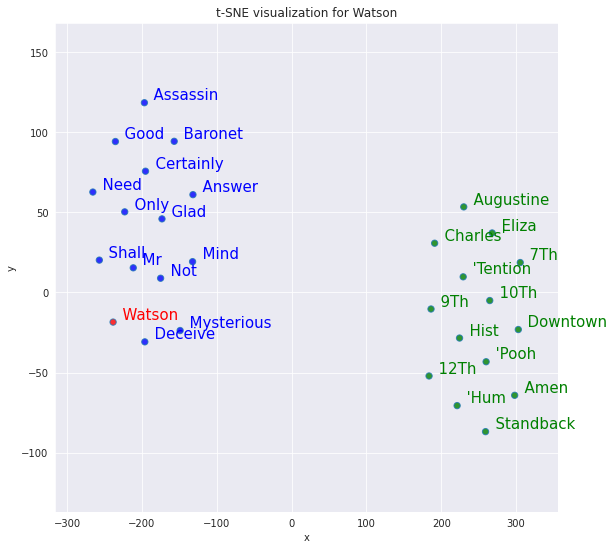

In [31]:
#-----------------------Parameters------------------------
word_ = 'watson'
top_ = 14
embedding_size_ = 50
n_components_ = 20

#--------------Get similar and disimilar words------------
similar_words_ = get_top_n_similar_words(w2v_model, word_, top_)
disimilar_words_ = get_top_n_disimilar_words(w2v_model, word_, top_)

#---------------------------Get data from tSNE------------------------------
data, labels, colors = tsne_generation(w2v_model, word_, n_components_, similar_words_, disimilar_words_, embedding_size_)
plot_tsne(data, word_, labels, colors)